In [1]:
# load libraries
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(arrow)))
suppressWarnings(suppressPackageStartupMessages(library(patchwork)))
suppressWarnings(suppressPackageStartupMessages(library(ggsignif)))
# import ggplot theme
source("../../utils/figure_themes.r")

In [2]:
# path to the anova data
anova_genotype_df_path <- file.path("..","..","data","6.analysis_results","custom_aggregated_anova_results.parquet")
custom_aggregated_data_path <- file.path("..","..","data","5.converted_data","custom_aggregated_data.parquet")
fig_path <- file.path("..","figures","custom_aggregated")
# make the directory if it doesn't exist
if (!dir.exists(fig_path)) dir.create(fig_path)

# read the data
custom_aggregated_data <- arrow::read_parquet(custom_aggregated_data_path)
head(custom_aggregated_data)

# read the anova data
anova_genotype_df <- arrow::read_parquet(anova_genotype_df_path)

Metadata_genotype,Metadata_replicate,AreaShape_Area,AreaShape_CentralMoment_0_0,AreaShape_CentralMoment_0_1,AreaShape_CentralMoment_0_2,AreaShape_CentralMoment_0_3,AreaShape_CentralMoment_1_0,AreaShape_CentralMoment_1_1,AreaShape_CentralMoment_1_2,⋯,Texture_SumEntropy_OP_3_02_256,Texture_SumEntropy_OP_3_03_256,Texture_SumVariance_OP_3_00_256,Texture_SumVariance_OP_3_01_256,Texture_SumVariance_OP_3_02_256,Texture_SumVariance_OP_3_03_256,Texture_Variance_OP_3_00_256,Texture_Variance_OP_3_01_256,Texture_Variance_OP_3_02_256,Texture_Variance_OP_3_03_256
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
high,1,1.192966,0.5964828,0.54175256,-0.04923743,0.7817362,2.1009152,-0.9278737,-0.04298225,⋯,-0.2082104,-0.11903633,-1.0917116,-0.52502679,-1.0866094,-0.54458881,-1.1151266,-0.5621014,-1.1179528,-0.5608718
high,10,2.477908,1.2389540,1.31962606,1.72236419,-1.7485946,0.1791951,-3.2895193,0.82527013,⋯,1.2939544,0.63535604,1.2613638,0.64209101,1.1875076,0.63527378,1.1157257,0.5484734,1.1219693,0.5477695
high,11,4.262414,2.1312071,1.26173108,1.42646941,0.5831822,1.8012069,-0.5413249,-0.16430652,⋯,1.3735418,0.67823043,1.1047649,0.57082297,1.0525320,0.54847464,0.9976509,0.4862685,1.0001664,0.4902130
high,12,2.402476,1.2012381,0.04988604,1.27911918,-0.9281710,-1.6528531,-1.9646186,0.10767961,⋯,0.6190094,0.30893327,-0.1095573,-0.05987619,-0.1967998,-0.06793023,-0.2075640,-0.1093674,-0.2021711,-0.1067718
high,13,2.389777,1.1948884,-1.10873607,-0.03446555,0.1017650,-1.3449799,-0.9673454,-0.79443383,⋯,0.1134128,0.04774139,-0.6503412,-0.29567384,-0.6420772,-0.32243559,-0.6968174,-0.3562547,-0.7005716,-0.3521677
high,14,4.553584,2.2767921,-4.77707191,1.69171903,0.2514737,-0.7138870,-3.1808175,0.11087396,⋯,2.0541319,1.02583400,2.5108502,1.27093366,2.4192843,1.24875506,2.3347969,1.1480302,2.3437433,1.1541288


In [3]:
# load levene data in 
levene_df_path <- file.path("..","..","data","6.analysis_results","custom_aggregated_levene_test_results.csv")
levene_df <- read.csv(levene_df_path)
# make a new column for ***
levene_df$significance <- ifelse(
    levene_df$levene_p_value < 0.001, "***", 
    ifelse(levene_df$levene_p_value < 0.01, "**", 
    ifelse(levene_df$levene_p_value < 0.05, "*", 
    "ns")
    )
)
head(levene_df)

,X,feature,levene_statistic,levene_p_value,group,significance
,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,909,RadialDistribution_ZernikePhase_OP_6_6,1.928452e-03,0.9980735,all,ns
2,90,AreaShape_Zernike_8_4,1.841247e-05,0.9966091,high_vs_unsel,ns
3,540,AreaShape_NormalizedMoment_3_3,4.582473e-05,0.9946505,unsel_vs_wt,ns
4,1,AreaShape_CentralMoment_0_0,5.003355e-05,0.9944103,high_vs_unsel,ns
5,920,RadialDistribution_ZernikePhase_OP_9_3,1.116004e-02,0.9889052,all,ns
6,248,AreaShape_CentralMoment_0_3,2.635471e-04,0.9871715,high_vs_wt,ns


In [4]:
head(anova_genotype_df)

group1,group2,meandiff,p-adj,lower,upper,reject,feature,anova_p_value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>
high,unsel,-3.4266,0.0000,-4.6531,-2.2001,TRUE,AreaShape_Area,4.479053e-12
high,wt,-5.1908,0.0000,-6.4173,-3.9643,TRUE,AreaShape_Area,4.479053e-12
unsel,wt,-1.7642,0.0033,-2.9907,-0.5377,TRUE,AreaShape_Area,4.479053e-12
high,unsel,-1.4484,0.0000,-1.9694,-0.9273,TRUE,AreaShape_CentralMoment_0_0,3.794260e-11
high,wt,-2.0158,0.0000,-2.5369,-1.4948,TRUE,AreaShape_CentralMoment_0_0,3.794260e-11
unsel,wt,-0.5674,0.0302,-1.0885,-0.0464,TRUE,AreaShape_CentralMoment_0_0,3.794260e-11


In [5]:
width <- 4
height <- 4
options(repr.plot.width = width, repr.plot.height = height)
# make a new column for the group1 and group2
anova_genotype_df$comparison <- paste(anova_genotype_df$group1, anova_genotype_df$group2, sep = " - ")

# order the results by anova p-value
anova_genotype_df <- anova_genotype_df %>% arrange(anova_p_value)
features <- unique(anova_genotype_df$feature)[1:20]
features
top_10_anova_genotype_df <- anova_genotype_df %>% filter(feature %in% features)
top_10_anova_genotype_df$log10_tukey_p_value <- -log10(top_10_anova_genotype_df$`p-adj`)
# make the genotype a factor
# replace the genotype values
custom_aggregated_data$Metadata_genotype <- gsub("wt", "Wild Type", custom_aggregated_data$Metadata_genotype)
custom_aggregated_data$Metadata_genotype <- gsub("unsel", "Mid-Severity", custom_aggregated_data$Metadata_genotype)
custom_aggregated_data$Metadata_genotype <- gsub("high", "High-Severity", custom_aggregated_data$Metadata_genotype)
custom_aggregated_data$Metadata_genotype <- factor(
    custom_aggregated_data$Metadata_genotype, 
    levels = c("Wild Type", "Mid-Severity", "High-Severity")
)
head(custom_aggregated_data)
# add features to the features list
features <- c(
    features,
    'AreaShape_HuMoment_0',
    'AreaShape_HuMoment_1',
    'AreaShape_HuMoment_2',
    'AreaShape_HuMoment_3',
    'AreaShape_HuMoment_4',
    'AreaShape_HuMoment_5',
    'AreaShape_HuMoment_6'
)

[1] "AreaShape_Zernike_2_0"               
 [2] "AreaShape_Zernike_0_0"               
 [3] "AreaShape_MedianRadius"              
 [4] "AreaShape_MaximumRadius"             
 [5] "Intensity_MeanIntensityEdge_OP"      
 [6] "AreaShape_MinFeretDiameter"          
 [7] "Intensity_MaxIntensityEdge_OP"       
 [8] "AreaShape_NormalizedMoment_2_0"      
 [9] "AreaShape_MeanRadius"                
[10] "AreaShape_Area"                      
[11] "AreaShape_SpatialMoment_0_0"         
[12] "AreaShape_ConvexArea"                
[13] "AreaShape_MinorAxisLength"           
[14] "AreaShape_InertiaTensorEigenvalues_1"
[15] "Intensity_StdIntensityEdge_OP"       
[16] "AreaShape_HuMoment_0"                
[17] "Intensity_LowerQuartileIntensity_OP" 
[18] "AreaShape_EquivalentDiameter"        
[19] "AreaShape_SpatialMoment_1_0"         
[20] "AreaShape_CentralMoment_0_0"

Metadata_genotype,Metadata_replicate,AreaShape_Area,AreaShape_CentralMoment_0_0,AreaShape_CentralMoment_0_1,AreaShape_CentralMoment_0_2,AreaShape_CentralMoment_0_3,AreaShape_CentralMoment_1_0,AreaShape_CentralMoment_1_1,AreaShape_CentralMoment_1_2,⋯,Texture_SumEntropy_OP_3_02_256,Texture_SumEntropy_OP_3_03_256,Texture_SumVariance_OP_3_00_256,Texture_SumVariance_OP_3_01_256,Texture_SumVariance_OP_3_02_256,Texture_SumVariance_OP_3_03_256,Texture_Variance_OP_3_00_256,Texture_Variance_OP_3_01_256,Texture_Variance_OP_3_02_256,Texture_Variance_OP_3_03_256
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High-Severity,1,1.192966,0.5964828,0.54175256,-0.04923743,0.7817362,2.1009152,-0.9278737,-0.04298225,⋯,-0.2082104,-0.11903633,-1.0917116,-0.52502679,-1.0866094,-0.54458881,-1.1151266,-0.5621014,-1.1179528,-0.5608718
High-Severity,10,2.477908,1.2389540,1.31962606,1.72236419,-1.7485946,0.1791951,-3.2895193,0.82527013,⋯,1.2939544,0.63535604,1.2613638,0.64209101,1.1875076,0.63527378,1.1157257,0.5484734,1.1219693,0.5477695
High-Severity,11,4.262414,2.1312071,1.26173108,1.42646941,0.5831822,1.8012069,-0.5413249,-0.16430652,⋯,1.3735418,0.67823043,1.1047649,0.57082297,1.0525320,0.54847464,0.9976509,0.4862685,1.0001664,0.4902130
High-Severity,12,2.402476,1.2012381,0.04988604,1.27911918,-0.9281710,-1.6528531,-1.9646186,0.10767961,⋯,0.6190094,0.30893327,-0.1095573,-0.05987619,-0.1967998,-0.06793023,-0.2075640,-0.1093674,-0.2021711,-0.1067718
High-Severity,13,2.389777,1.1948884,-1.10873607,-0.03446555,0.1017650,-1.3449799,-0.9673454,-0.79443383,⋯,0.1134128,0.04774139,-0.6503412,-0.29567384,-0.6420772,-0.32243559,-0.6968174,-0.3562547,-0.7005716,-0.3521677
High-Severity,14,4.553584,2.2767921,-4.77707191,1.69171903,0.2514737,-0.7138870,-3.1808175,0.11087396,⋯,2.0541319,1.02583400,2.5108502,1.27093366,2.4192843,1.24875506,2.3347969,1.1480302,2.3437433,1.1541288


In [6]:
width <- 10
height <- 8

list_of_custom_aggregated_feature_plots <- list()

for (i in 1:length(features)){
    print(features[i])
    # get the top feature
    tmp <- custom_aggregated_data %>% select(c("Metadata_genotype", features[i]))
    # aggregate the data to get the mean and standard deviation of the top feature
    tmp <- tmp %>% group_by(Metadata_genotype) %>% summarise(mean = mean(!!as.name(features[i])), sd = sd(!!as.name(features[i])))
    # get the AreaShape_ConvexArea feature
    tmp_df <- levene_df %>% filter(feature == features[i])
    # get the high_vs_unselected significance
    high_vs_unselected_significance <- tmp_df %>% filter(group == "high_vs_unsel")
    high_vs_unselected_significance <- high_vs_unselected_significance$significance
    WT_vs_unselected_significance <- tmp_df %>% filter(group == "unsel_vs_wt")
    WT_vs_unselected_significance <- WT_vs_unselected_significance$significance
    WT_vs_high_significance <- tmp_df %>% filter(group == "high_vs_wt")
    WT_vs_high_significance <- WT_vs_high_significance$significance
    all_significance <- tmp_df %>% filter(group == "all")
    all_significance <- all_significance$significance
    

    # calculate the variance where variance = sd^2
    tmp$variance <- tmp$sd^2
    title <- gsub("_", " ", features[i])
    # plot the variability of the top feature
    var_plot <- (
        ggplot(tmp, aes(x = Metadata_genotype, y = variance, fill = Metadata_genotype)) 
        + geom_bar(stat = "identity")
        + theme(axis.text.x = element_text(angle = 90, hjust = 1))
        + labs(title = title, x = "Genotype", y = "Variance", fill = "Genotype")
        + theme_bw()
        + figure_theme
        # + ylim(0,1)
        # add significance bars
        + geom_signif(
            comparisons = list(c("High-Severity","Mid-Severity")), 
            annotations = high_vs_unselected_significance,
            textsize = 7
        ) 
        + geom_signif(
            comparisons = list(c("Wild Type","Mid-Severity")), 
            annotations = WT_vs_unselected_significance, 
            textsize = 7
        )
        + geom_signif(
            comparisons = list(c("High-Severity","Wild Type")), 
            annotations = WT_vs_high_significance,
            textsize = 7,
            vjust = 0.1,
            # y_position = c(0.9, 0.99)
        )
        # remove the legend
        + theme(legend.position = "none")
    )
    # save var plot
    ggsave(file = paste0("custom_aggregated_",features[i], "_variance_plot.png"), plot = var_plot, path = file.path(fig_path), width = width, height = height, dpi = 600)

    list_of_custom_aggregated_feature_plots[[i]] <- var_plot
}

[1] "AreaShape_Zernike_2_0"


[1] "AreaShape_Zernike_0_0"


[1] "AreaShape_MedianRadius"


[1] "AreaShape_MaximumRadius"


[1] "Intensity_MeanIntensityEdge_OP"


[1] "AreaShape_MinFeretDiameter"


[1] "Intensity_MaxIntensityEdge_OP"


[1] "AreaShape_NormalizedMoment_2_0"


[1] "AreaShape_MeanRadius"


[1] "AreaShape_Area"


[1] "AreaShape_SpatialMoment_0_0"


[1] "AreaShape_ConvexArea"


[1] "AreaShape_MinorAxisLength"


[1] "AreaShape_InertiaTensorEigenvalues_1"


[1] "Intensity_StdIntensityEdge_OP"


[1] "AreaShape_HuMoment_0"


[1] "Intensity_LowerQuartileIntensity_OP"


[1] "AreaShape_EquivalentDiameter"


[1] "AreaShape_SpatialMoment_1_0"


[1] "AreaShape_CentralMoment_0_0"


[1] "AreaShape_HuMoment_0"


[1] "AreaShape_HuMoment_1"


[1] "AreaShape_HuMoment_2"


[1] "AreaShape_HuMoment_3"


[1] "AreaShape_HuMoment_4"


[1] "AreaShape_HuMoment_5"


[1] "AreaShape_HuMoment_6"


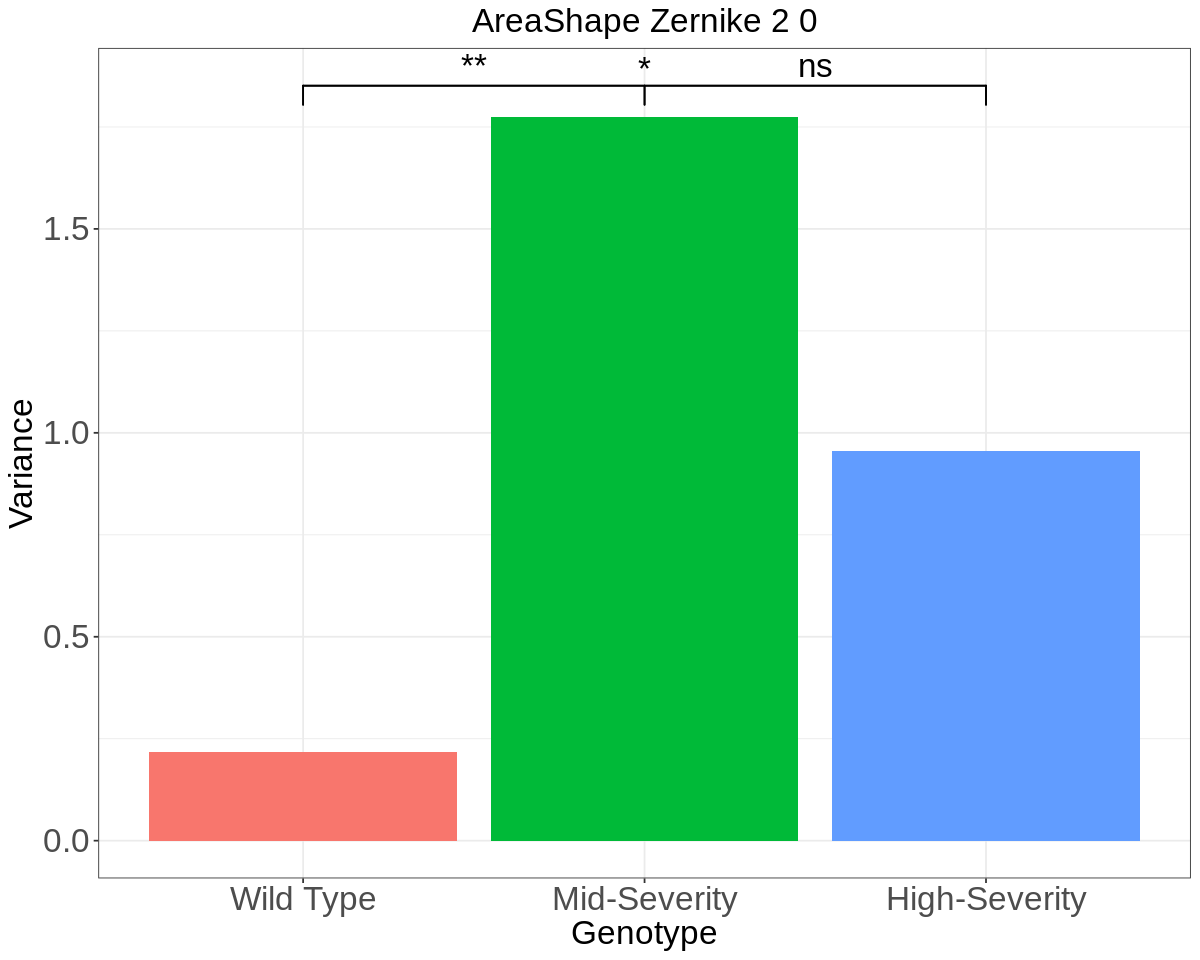

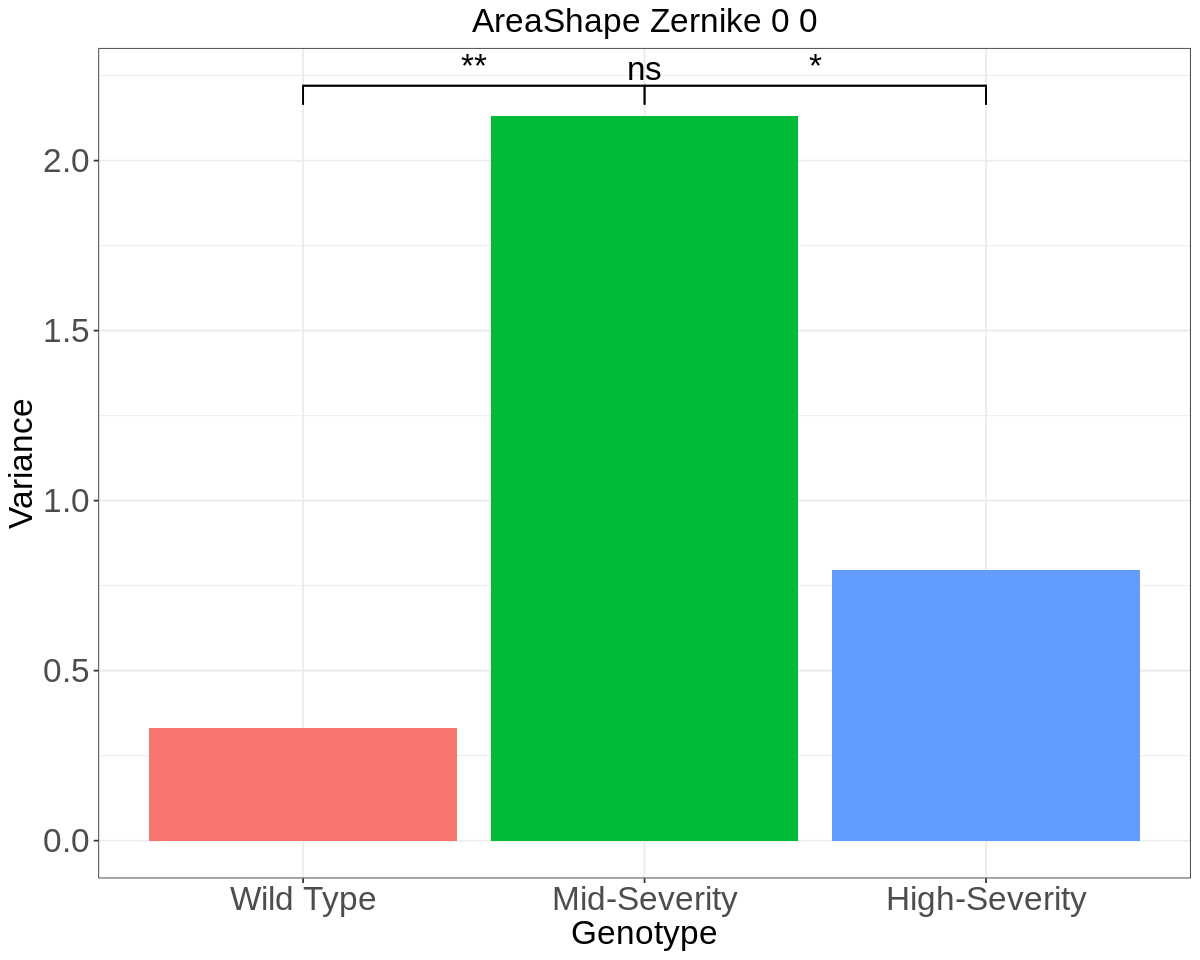

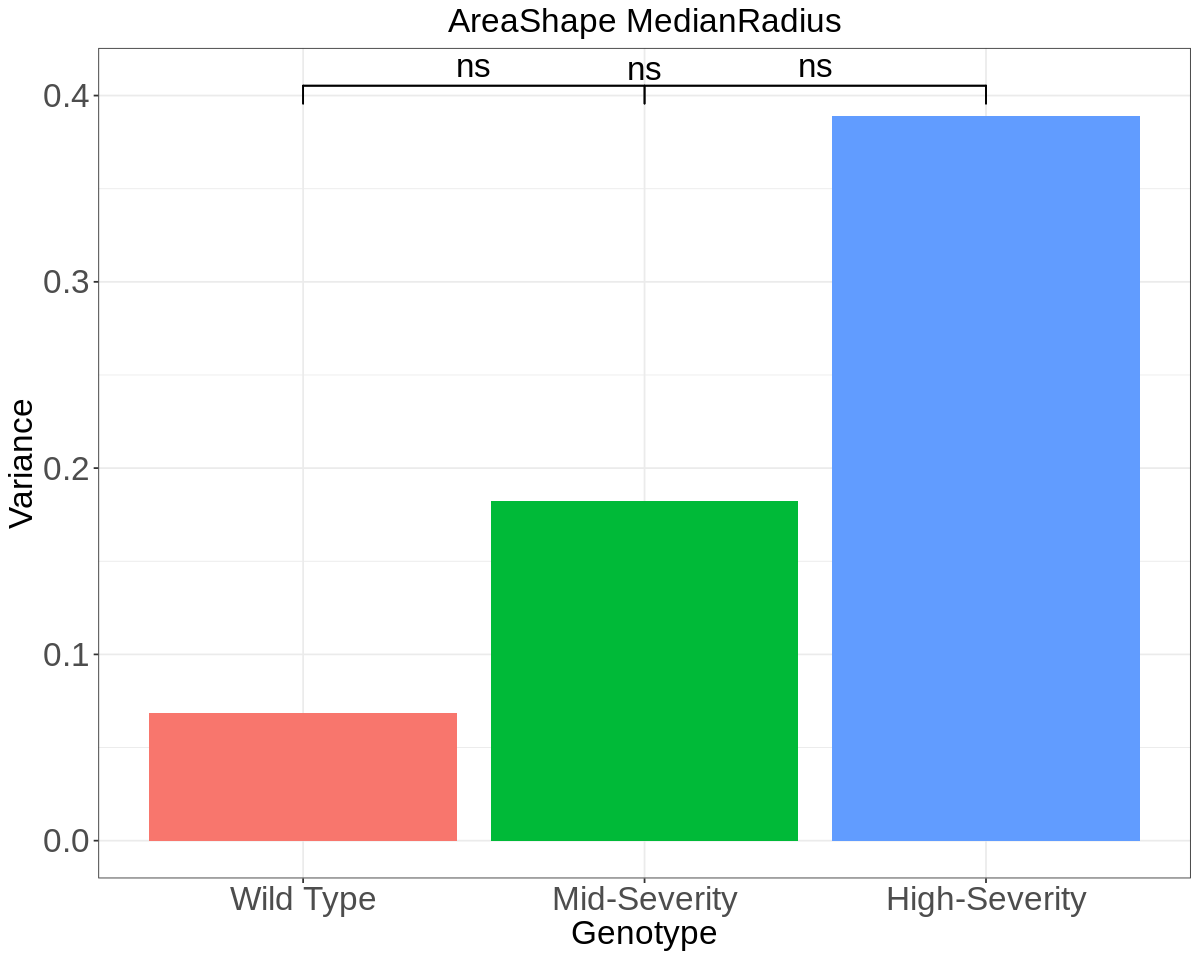

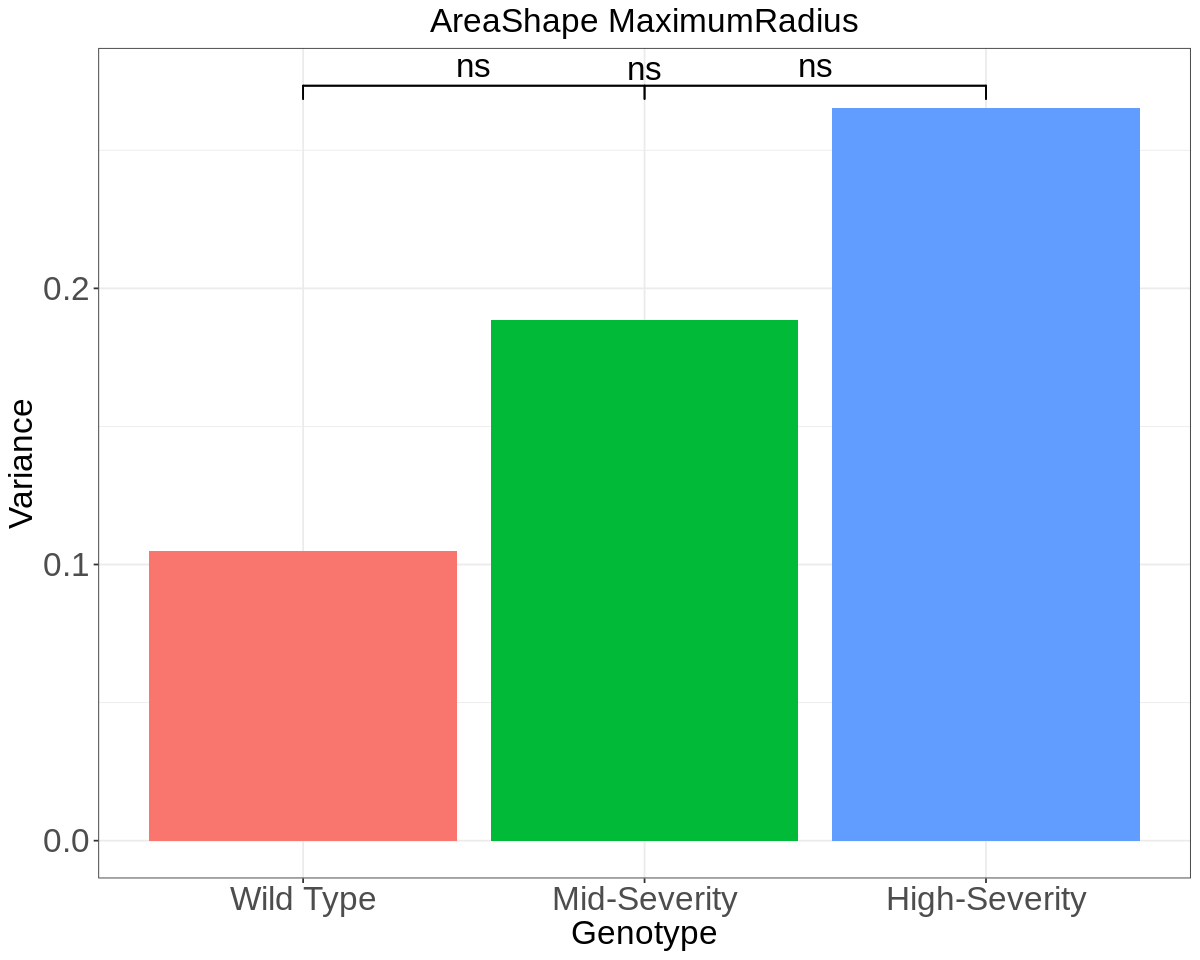

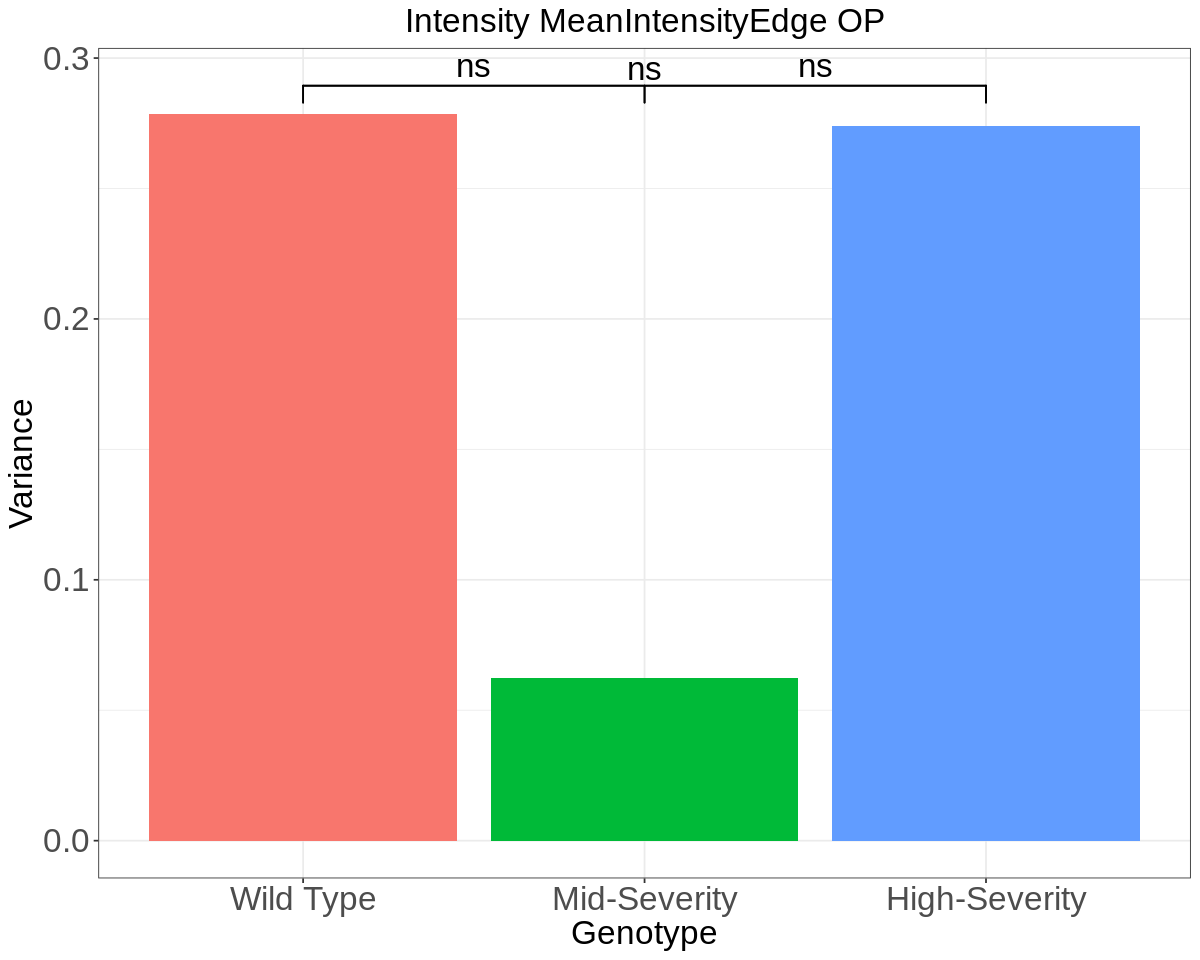

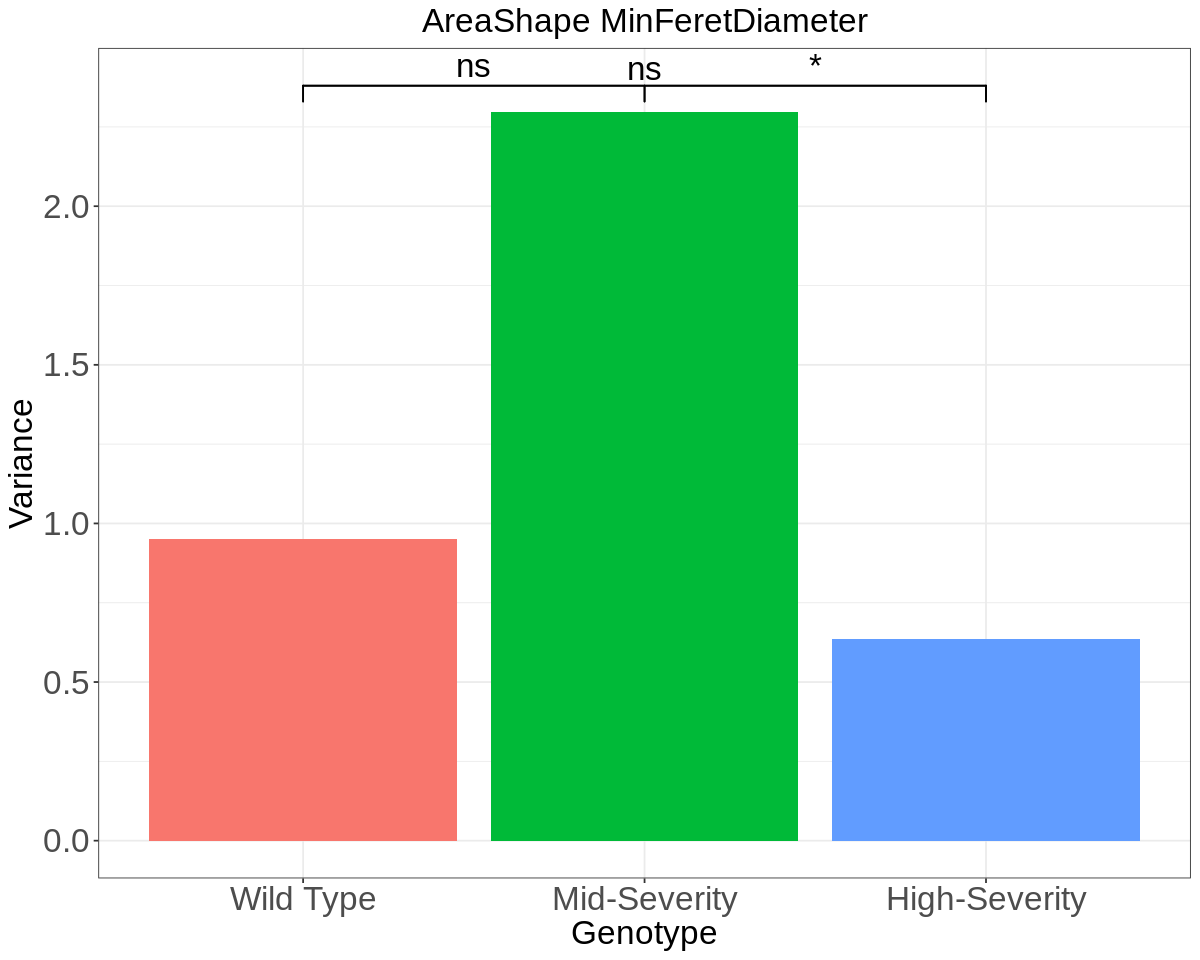

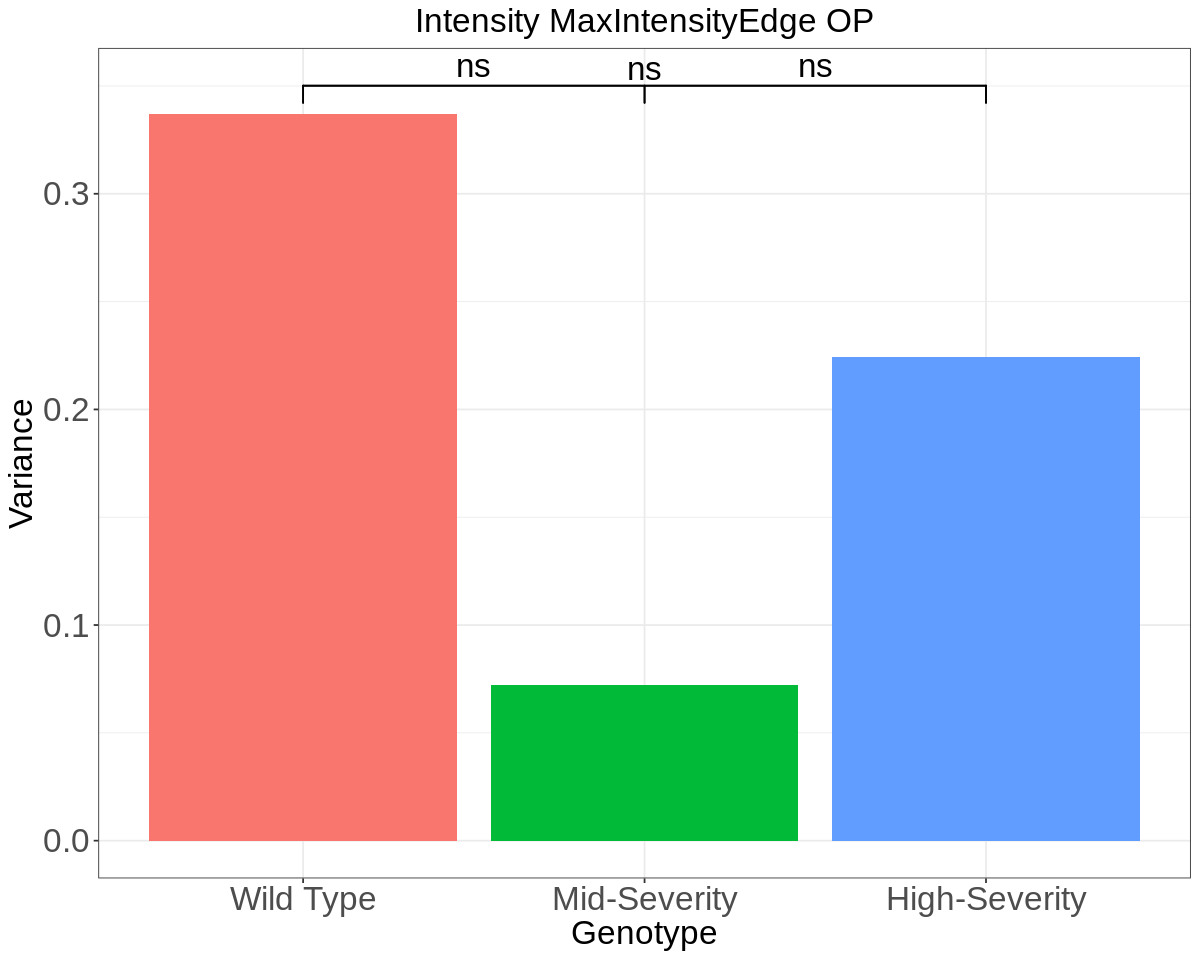

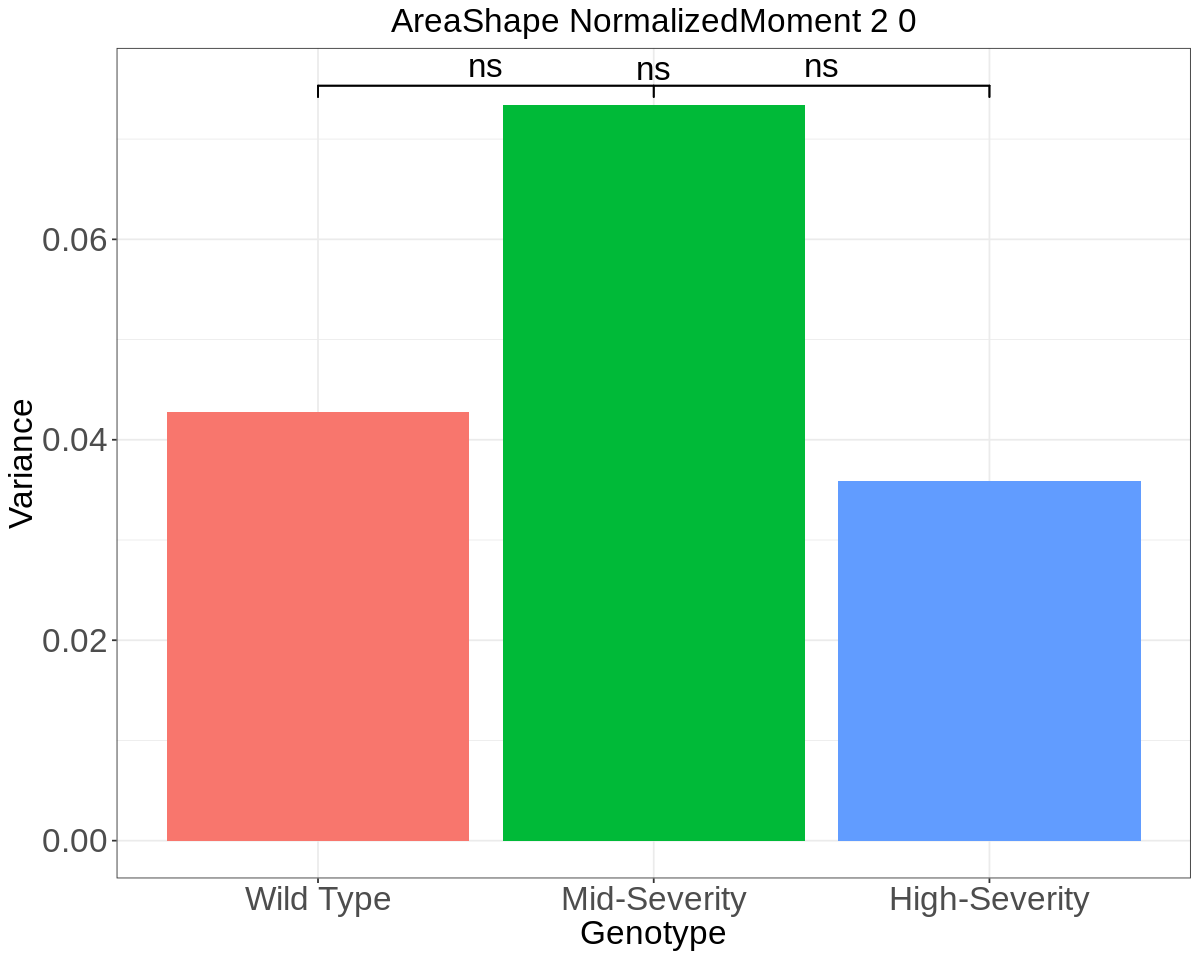

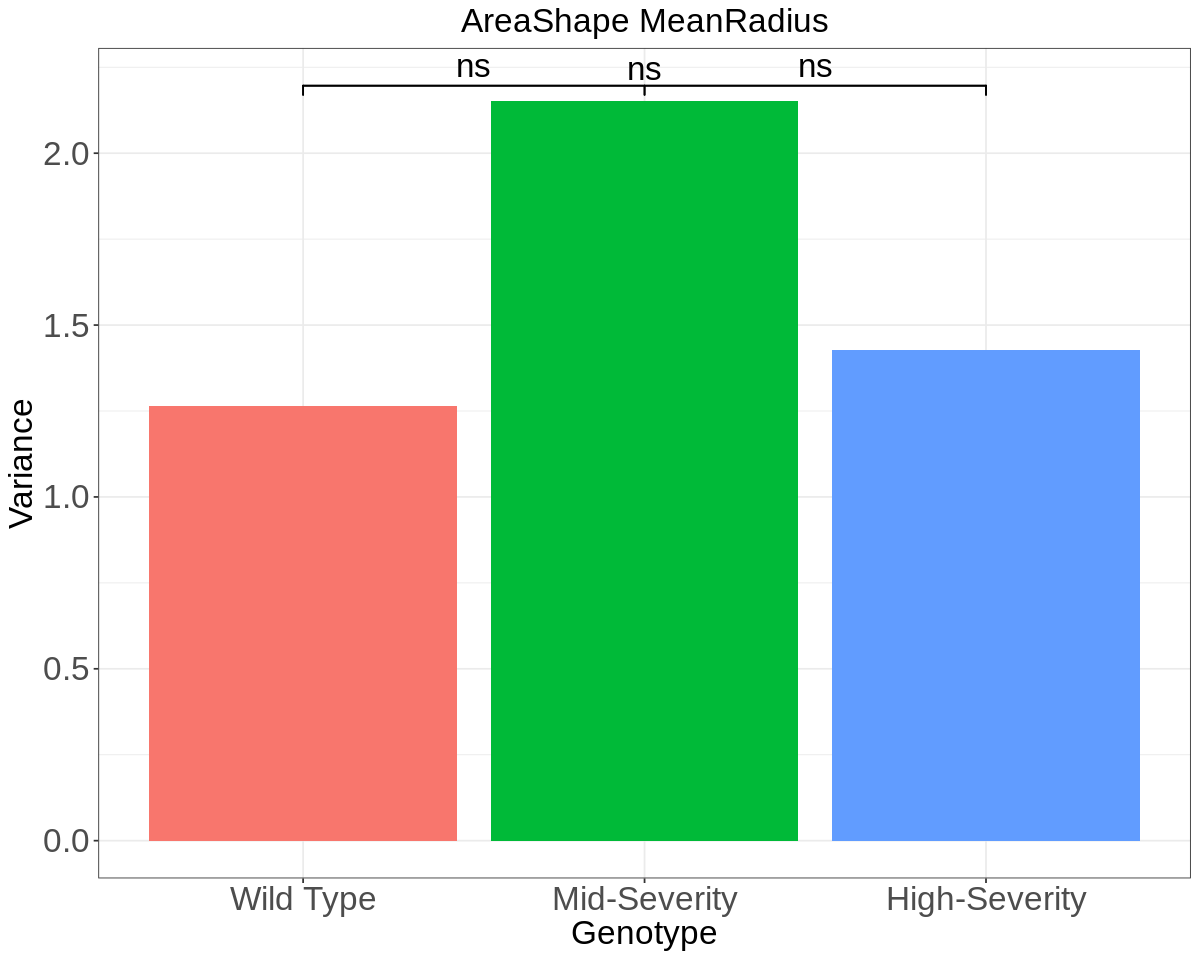

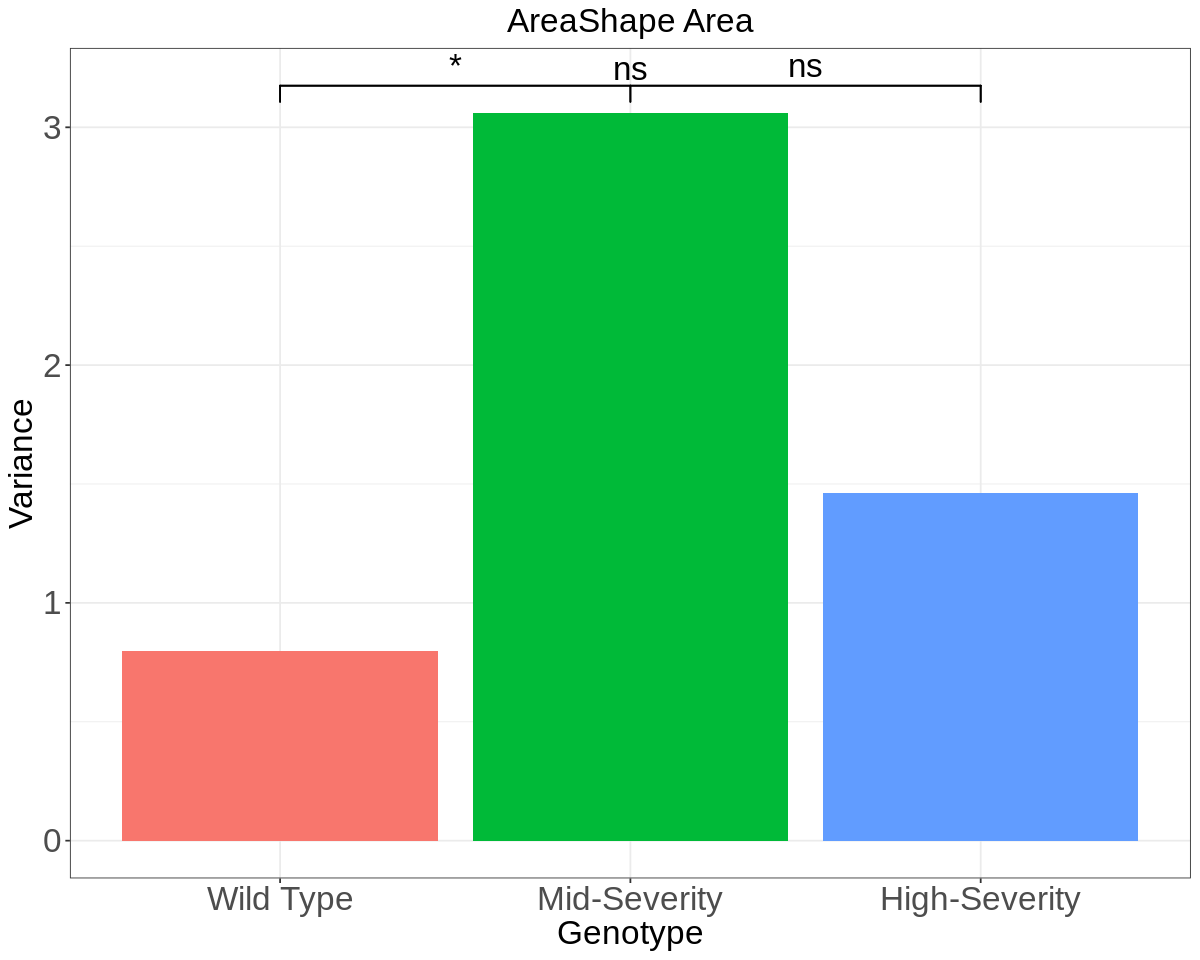

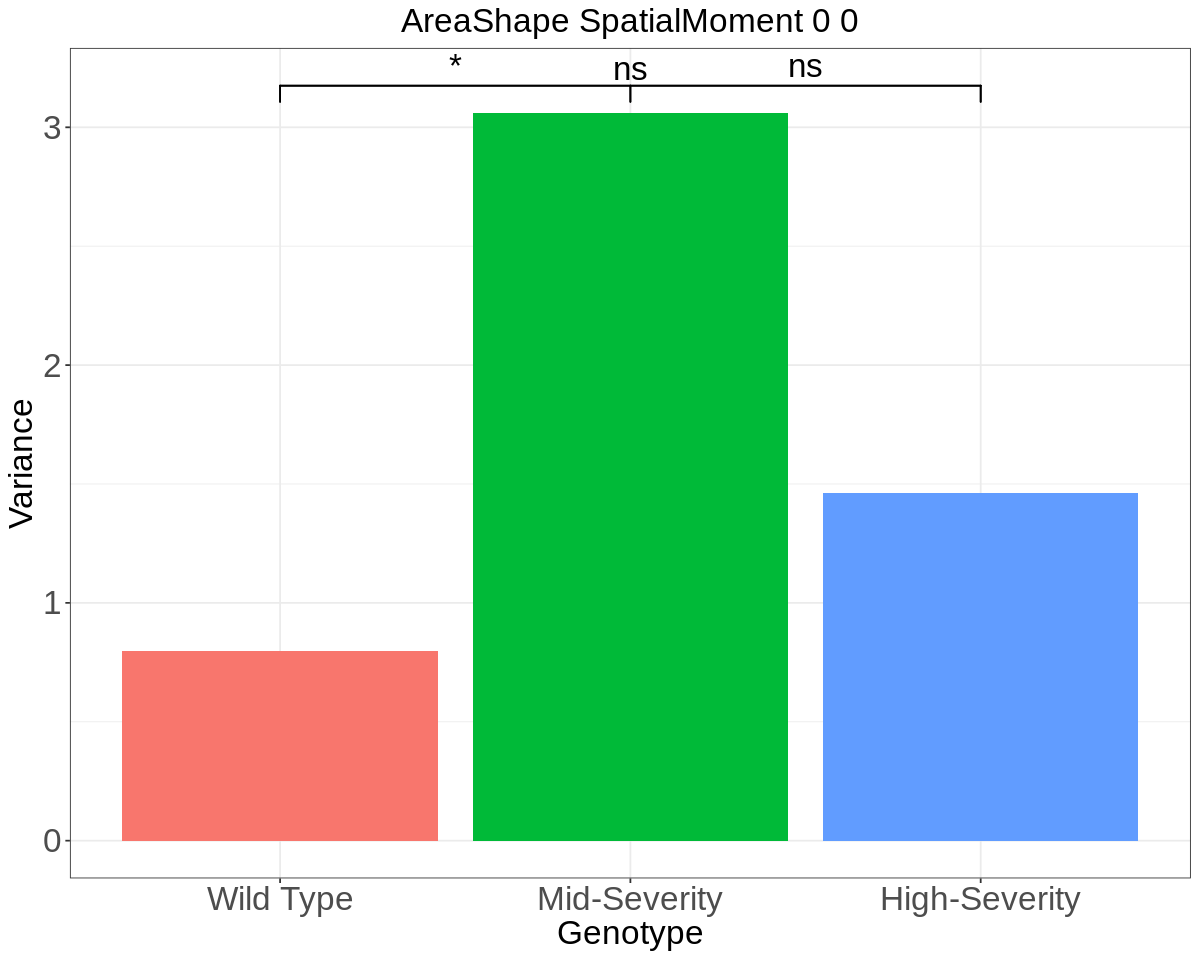

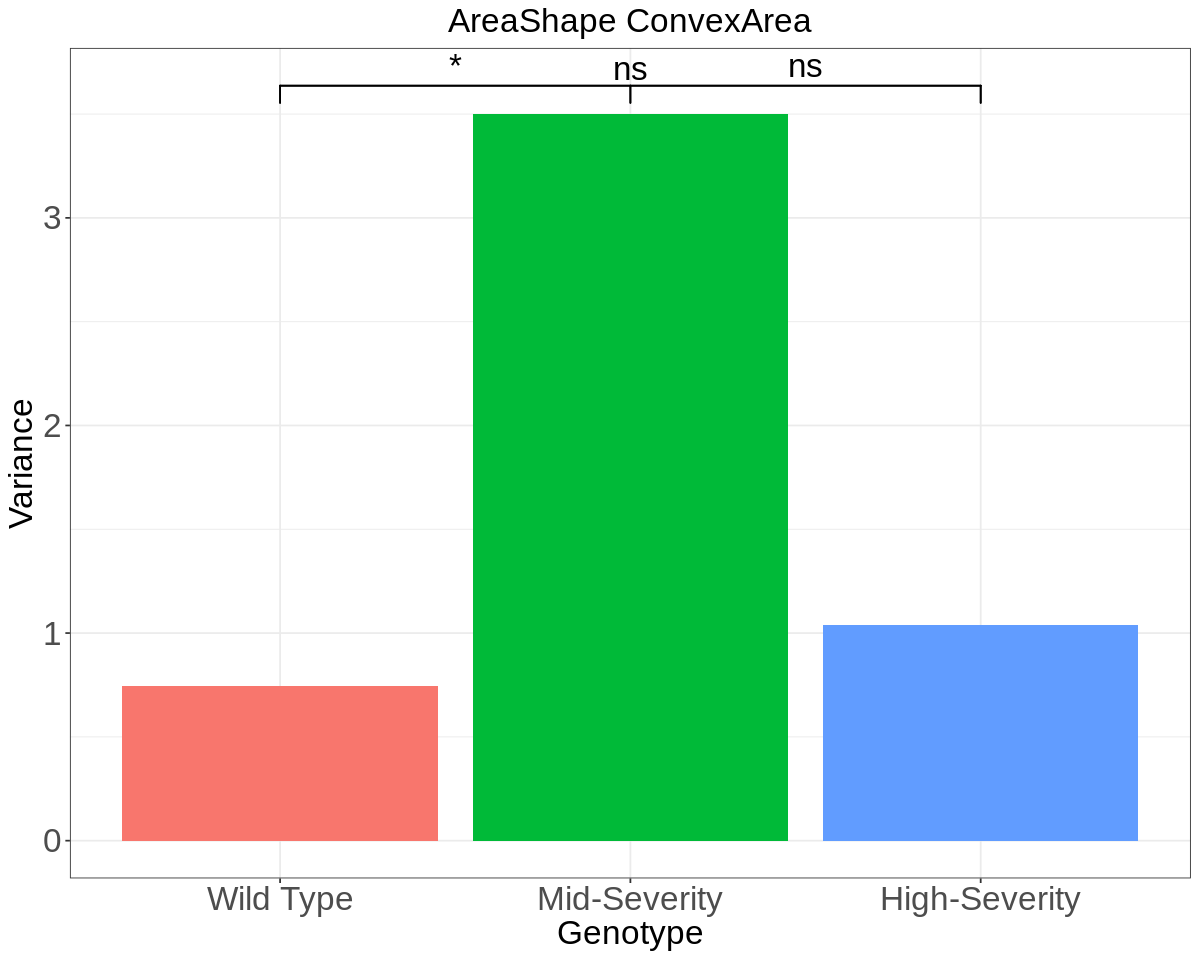

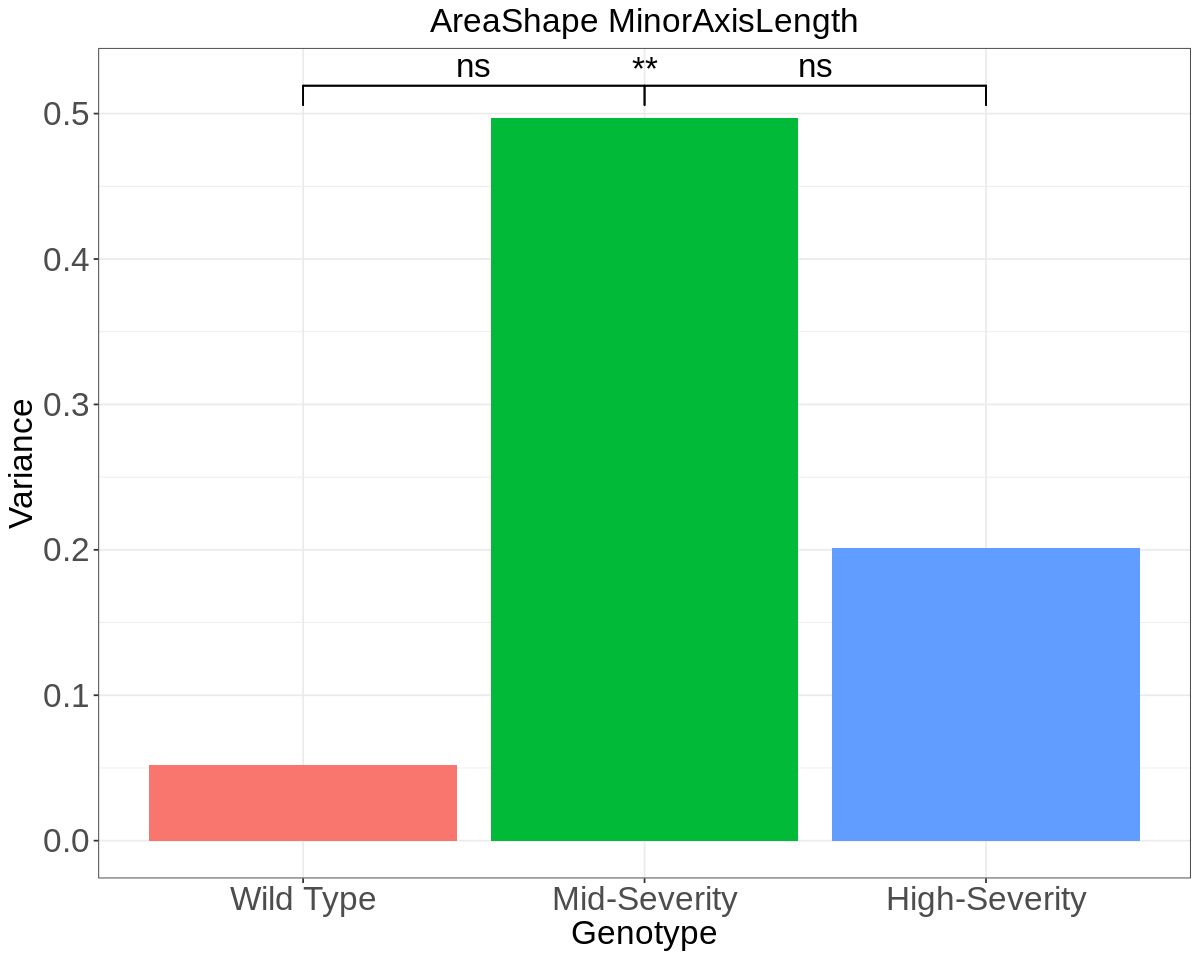

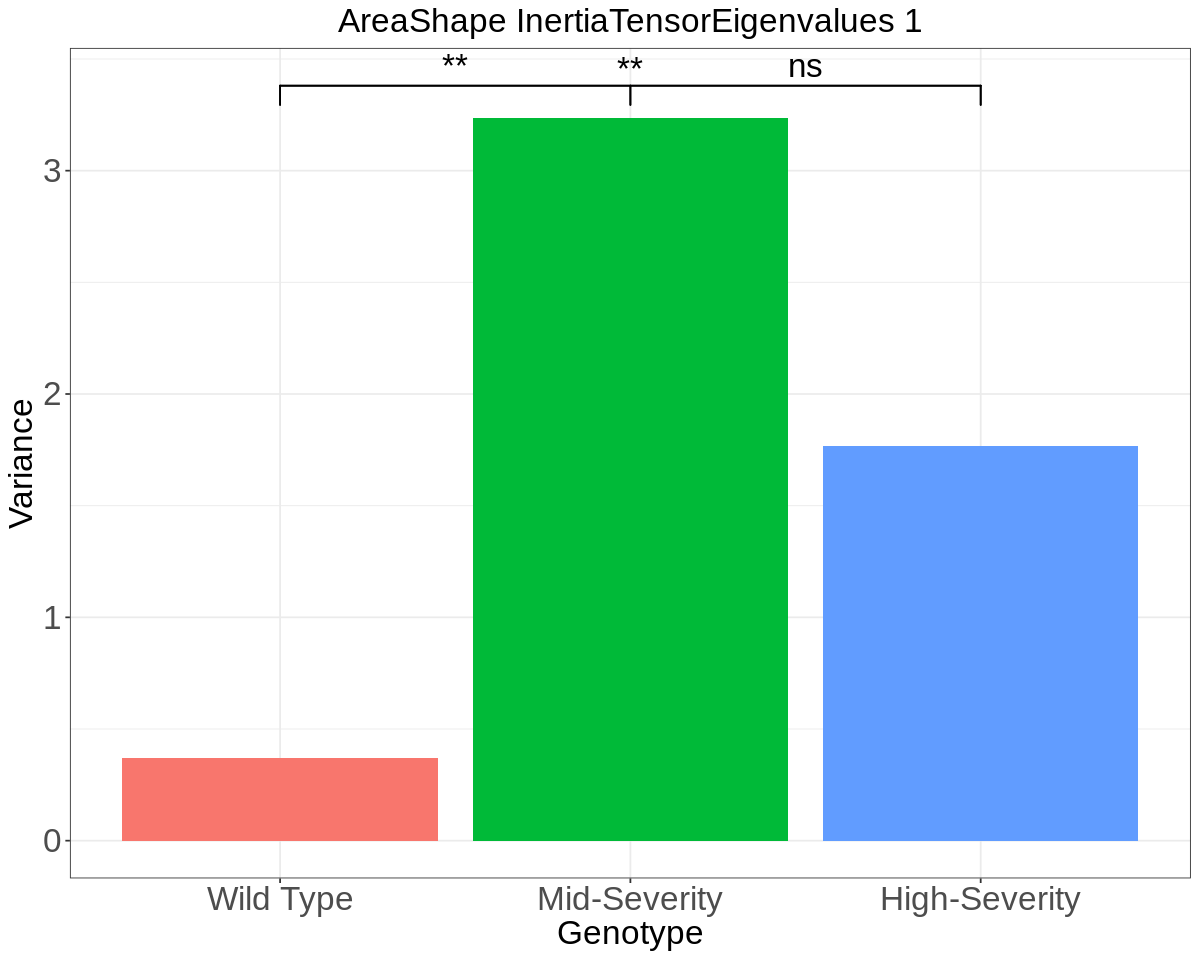

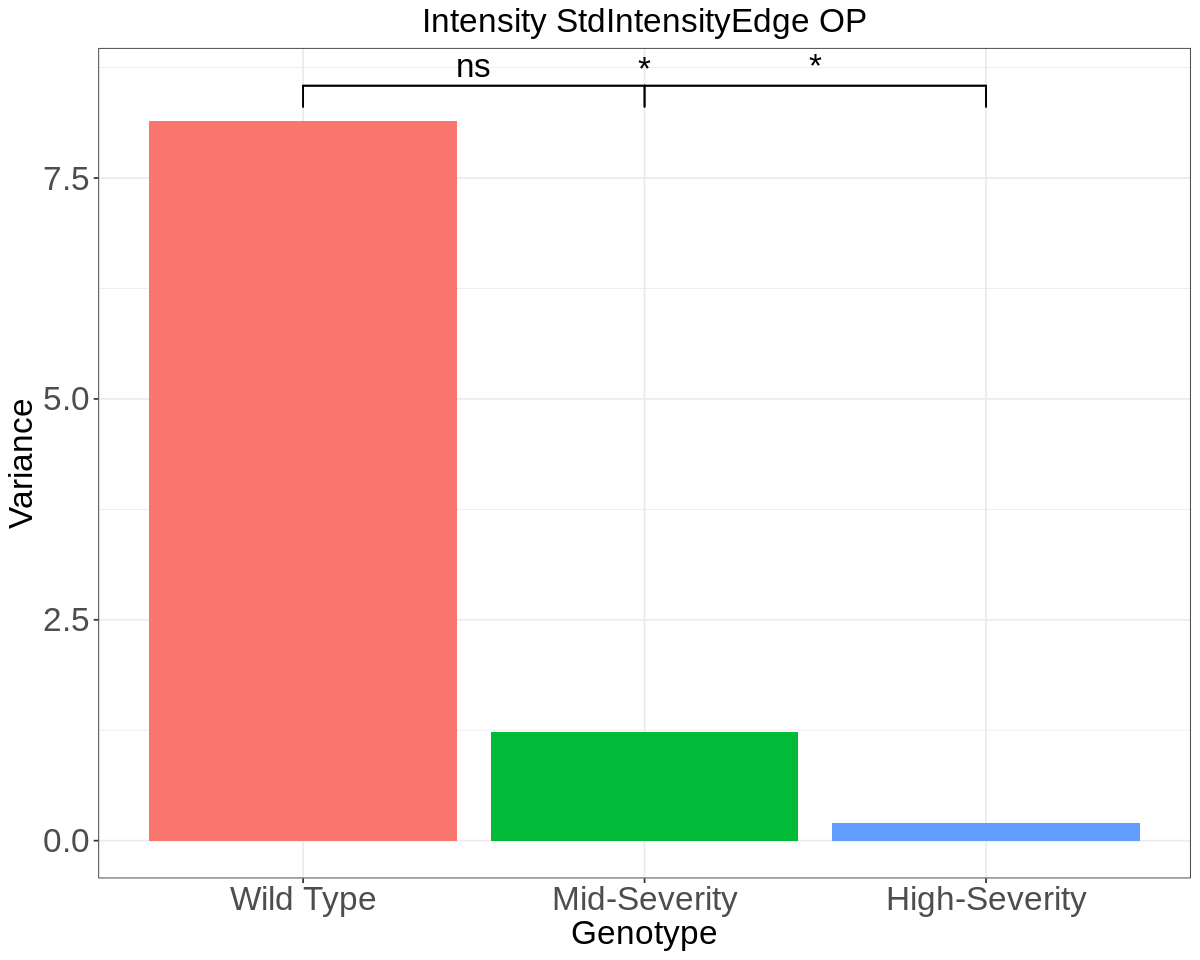

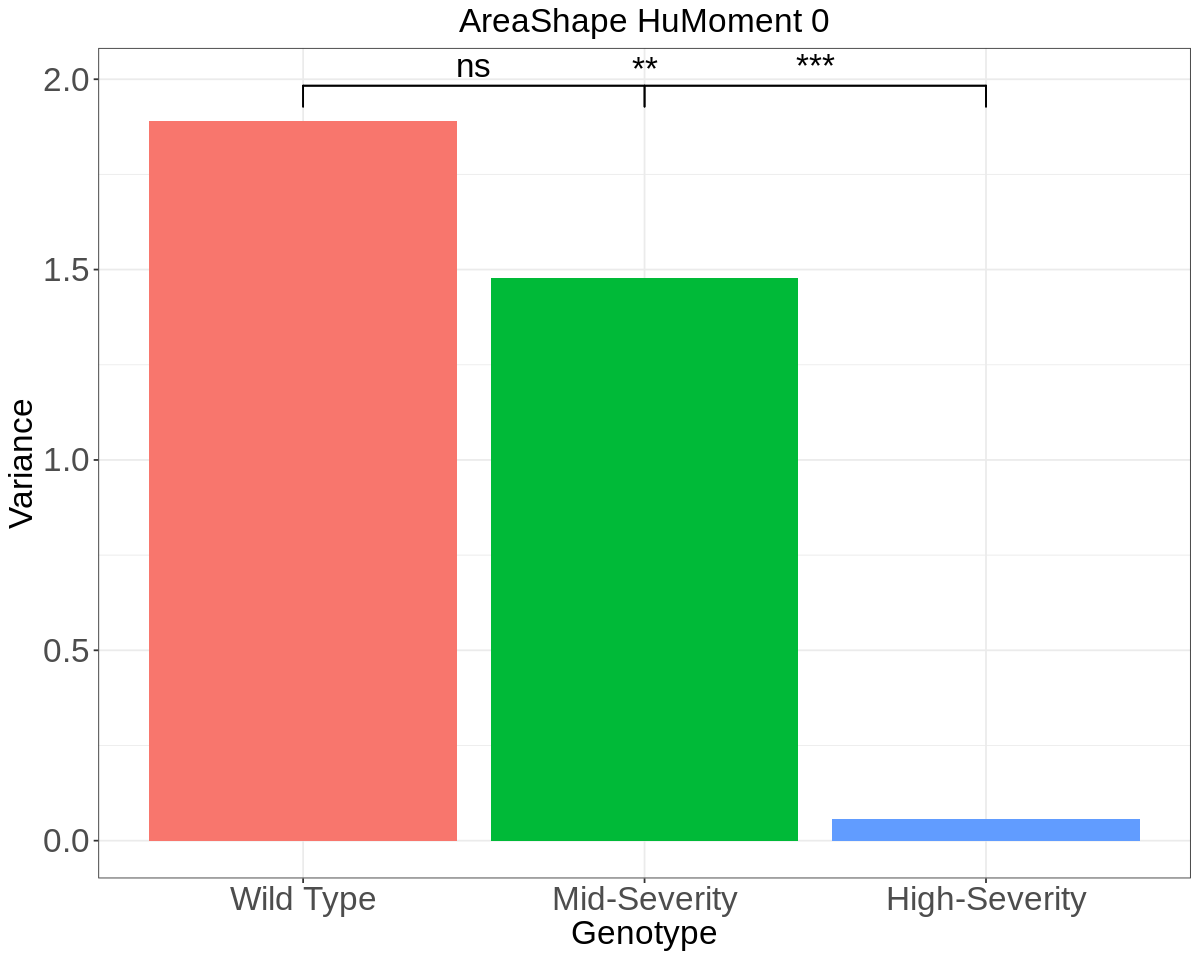

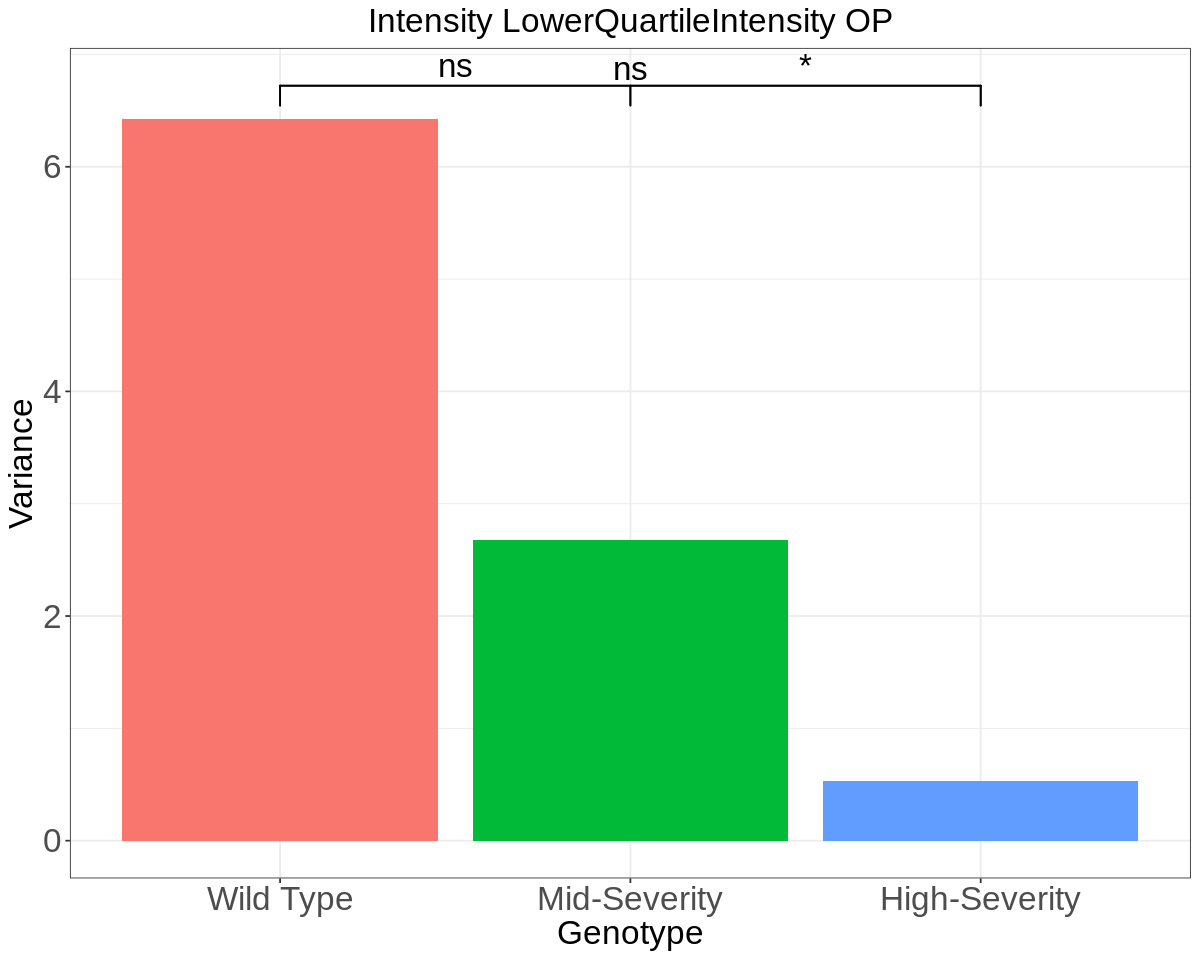

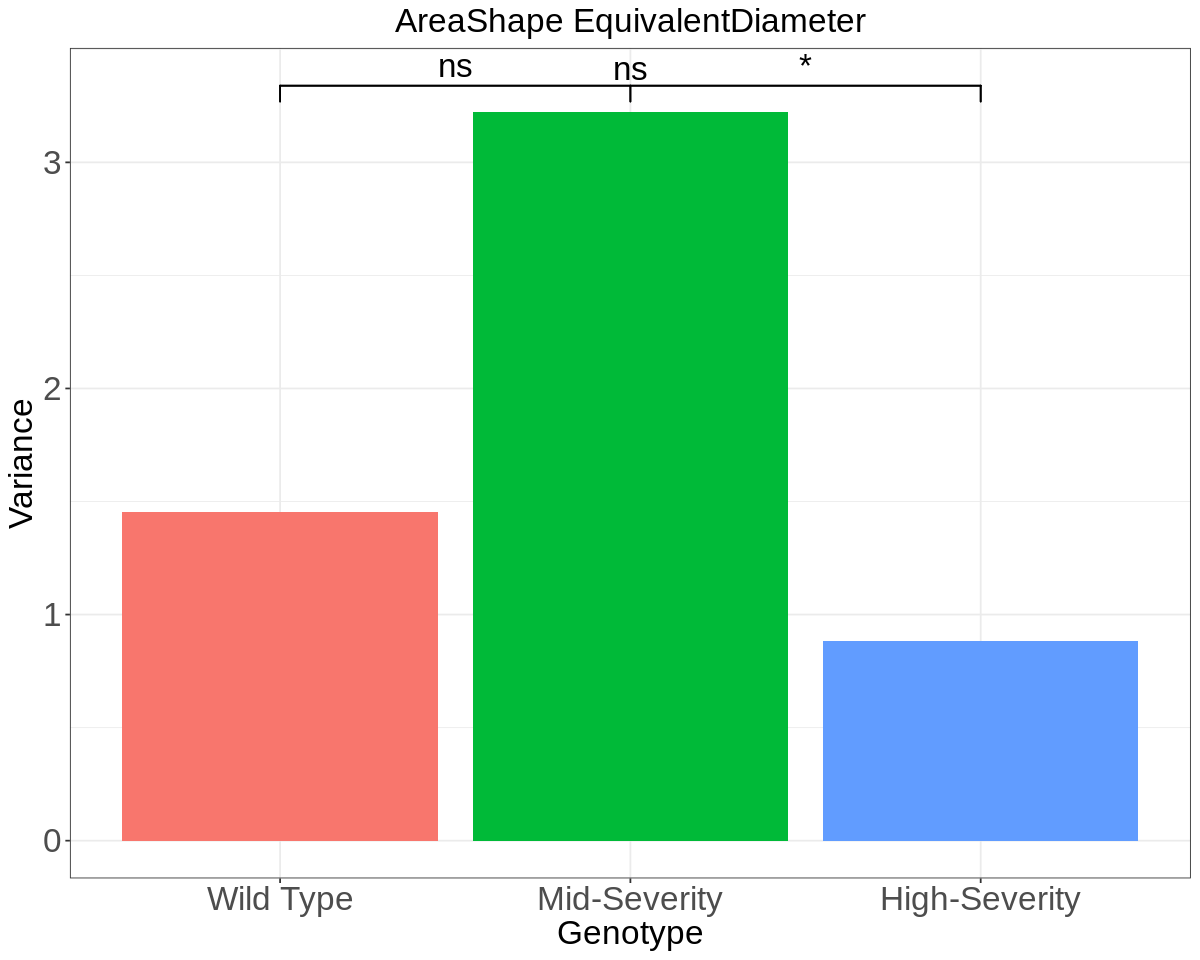

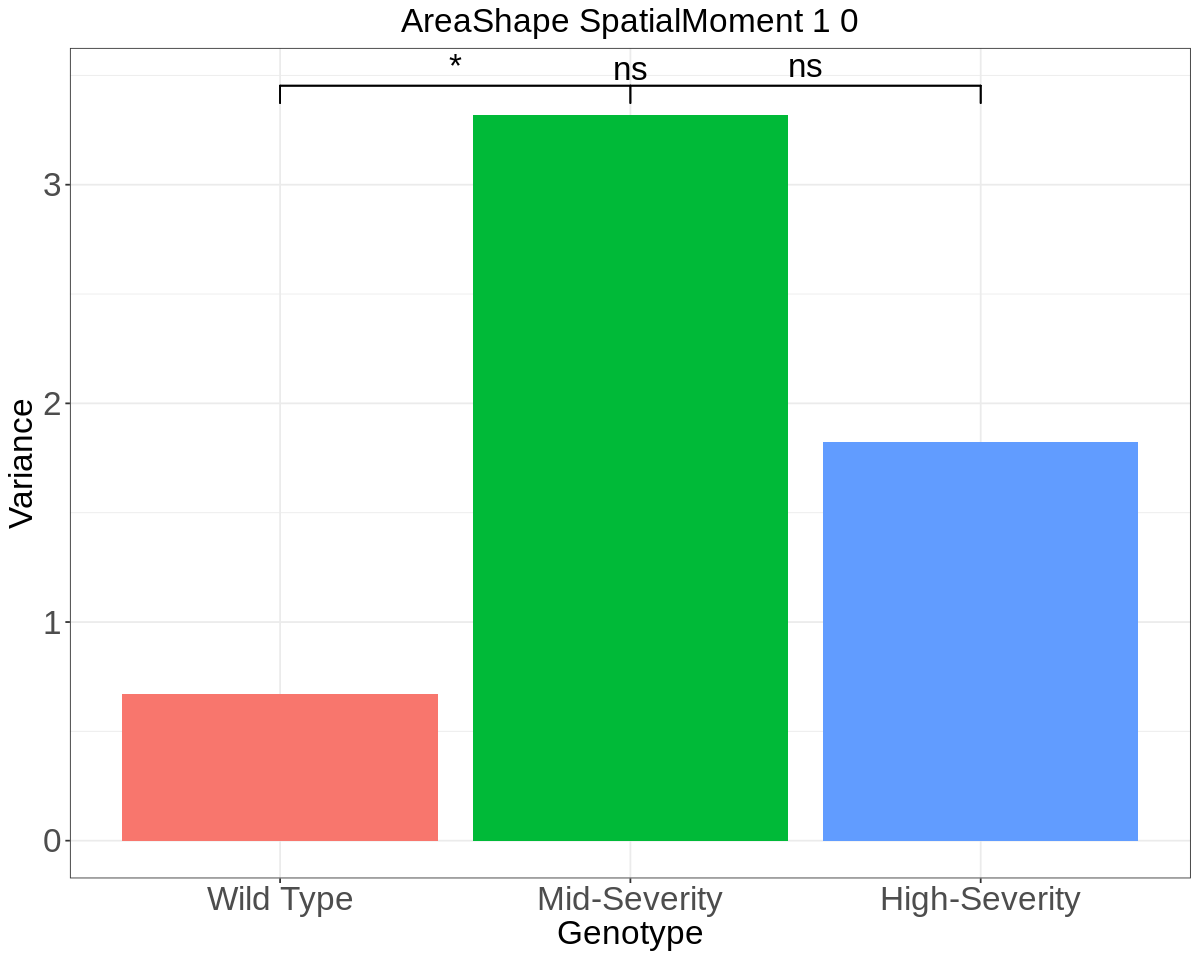

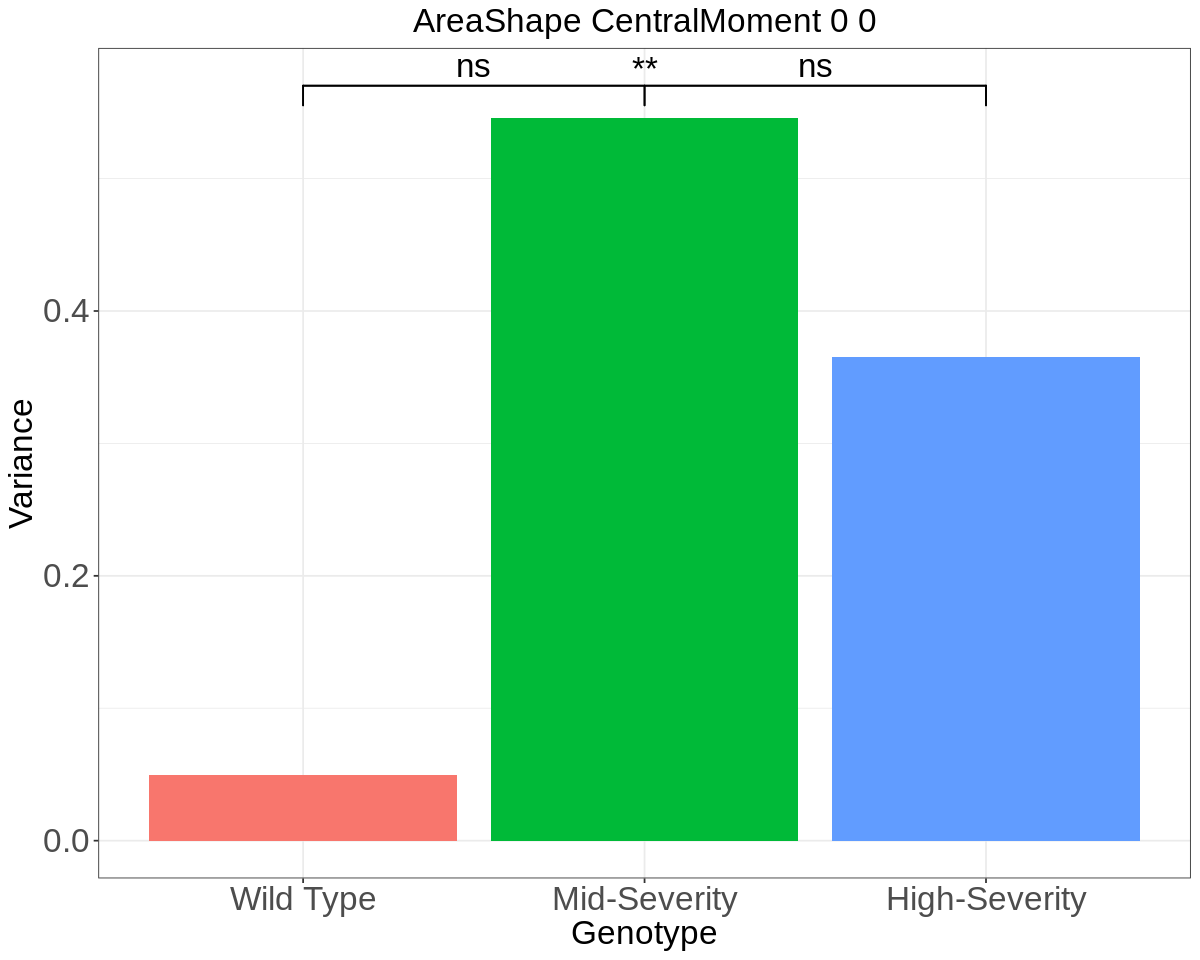

In [7]:
width <- 10
height <- 8
options(repr.plot.width = width, repr.plot.height = height)
list_of_custom_aggregated_feature_plots[[1]]
list_of_custom_aggregated_feature_plots[[2]]
list_of_custom_aggregated_feature_plots[[3]]
list_of_custom_aggregated_feature_plots[[4]]
list_of_custom_aggregated_feature_plots[[5]]
list_of_custom_aggregated_feature_plots[[6]]
list_of_custom_aggregated_feature_plots[[7]]
list_of_custom_aggregated_feature_plots[[8]]
list_of_custom_aggregated_feature_plots[[9]]
list_of_custom_aggregated_feature_plots[[10]]
list_of_custom_aggregated_feature_plots[[11]]
list_of_custom_aggregated_feature_plots[[12]]
list_of_custom_aggregated_feature_plots[[13]]
list_of_custom_aggregated_feature_plots[[14]]
list_of_custom_aggregated_feature_plots[[15]]
list_of_custom_aggregated_feature_plots[[16]]
list_of_custom_aggregated_feature_plots[[17]]
list_of_custom_aggregated_feature_plots[[18]]
list_of_custom_aggregated_feature_plots[[19]]
list_of_custom_aggregated_feature_plots[[20]]
